## Adapting Stackix to work with unpaired Miracle data

In [1]:
import autoencodix as acx
import os
from autoencodix.configs.stackix_config import StackixConfig
from autoencodix.configs.default_config import DataConfig, DataInfo, DataCase
os.chdir("..")
os.getcwd()


/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/home/ewald/Github/autoencodix_package'

In [2]:
import os

root_dir = os.path.join("data/miracle/Daten")
rna_file = "2025-05-16_RESTING_RNA_log2TPM_gene_name.parquet"
clin_file = "2025-05-16_RESTING_clinical.parquet" # TODO test with non filtered version including nans -> funktioniert :) 
mut_file = "2025-05-16_RESTING_WES_MutMatrix.parquet"
radio_con = "2025-05-16_RESTING_RADIO_contrast.parquet"
cell_deco = "2025-05-26_RESTING_celldeco.parquet"
clin_file_nas = "2025-05-16_RESTING_clinical.parquet"

# rna_file = "2025-05-16_RESTING_RNA_log2TPM_gene_name.parquet"
# clin_file = "2025-05-16_RESTING_clinical_noNAs.parquet"
# mut_file = "2025-05-16_RESTING_WES_MutMatrix.parquet"
# radio_con = "2025-05-16_RESTING_RADIO_contrast.parquet"
# cell_deco = "2025-05-26_RESTING_celldeco.parquet"

# Create a dictionary of DataInfo objects
data_info = {
    "RNA": DataInfo(file_path=os.path.join(root_dir, rna_file)),
    "clinical": DataInfo(file_path=os.path.join(root_dir, clin_file), data_type="ANNOTATION"),
    "mutation": DataInfo(file_path=os.path.join(root_dir, mut_file)),
    "radiology": DataInfo(file_path=os.path.join(root_dir, radio_con)),
    "cell_deconvolution": DataInfo(file_path=os.path.join(root_dir, cell_deco))
}

config = StackixConfig(
    data_config=DataConfig(
        data_info=data_info
    ),
    data_case=DataCase.MULTI_BULK,
    requires_paired=False,
	# checkpoint_interval=1,
	k_filter=300,
	latent_dim=8,
	train_ratio=0.8,
	valid_ratio=0.1,
	test_ratio=0.1,
    epochs = 200
)

stackix = acx.Stackix(config=config)

In [3]:
stackix.run()

/home/ewald/Github/autoencodix_package/src/autoencodix/utils/_bulkreader.py:201: UserWarning: For data modality 'RNA', 9 sample(s) were found without a corresponding annotation and will be dropped: ['RESTING_062', 'RESTING_129', 'RESTING_140', 'RESTING_141', 'RESTING_146', 'RESTING_179', 'RESTING_185', 'RESTING_253', 'RESTING_318']
  warnings.warn(
/home/ewald/Github/autoencodix_package/src/autoencodix/utils/_bulkreader.py:201: UserWarning: For data modality 'mutation', 5 sample(s) were found without a corresponding annotation and will be dropped: ['RESTING_062', 'RESTING_140', 'RESTING_141', 'RESTING_146', 'RESTING_253']
  warnings.warn(
/home/ewald/Github/autoencodix_package/src/autoencodix/utils/_bulkreader.py:201: UserWarning: For data modality 'cell_deconvolution', 9 sample(s) were found without a corresponding annotation and will be dropped: ['RESTING_062', 'RESTING_129', 'RESTING_140', 'RESTING_141', 'RESTING_146', 'RESTING_179', 'RESTING_185', 'RESTING_253', 'RESTING_318']
  wa

bulk_dfs keys in process_multi_bulk: dict_keys(['RNA', 'mutation', 'radiology', 'cell_deconvolution'])
--- Running Pairing-Aware Split ---
Identified 56 fully paired samples across all modalities.
Identified 115 samples present in at least one, but not all, modalities.
Successfully generated synchronized indices for all modalities.
Training ...
Training each modality model...
Training modality: RNA
Training modality: RNA
Epoch 1 - Train Loss: 11353.4441
Sub-losses: recon_loss: 11353.4431, var_loss: 0.0008, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 1359.6278
Sub-losses: recon_loss: 1359.6277, var_loss: 0.0001, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 10937.6646
Sub-losses: recon_loss: 10937.6636, var_loss: 0.0009, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 2 - Valid Loss: 1354.6315
Sub-losses: recon_loss: 1354.6313, var_loss: 0.0001, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 3 - Train Los

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: VarixArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x754ab019b8e0>, valid=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x754aab30ffa0>, test=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x754aab30fc10>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 6 × 8
final_reconstruction:

Creating plots ...


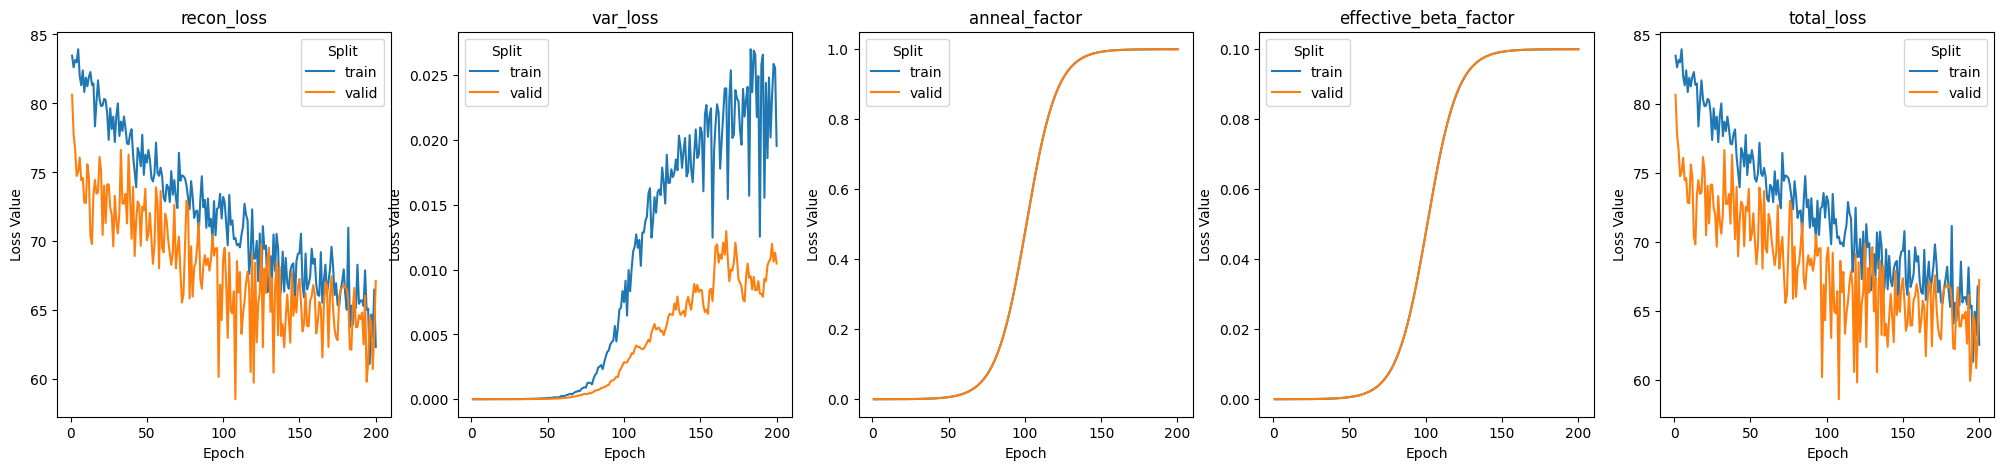

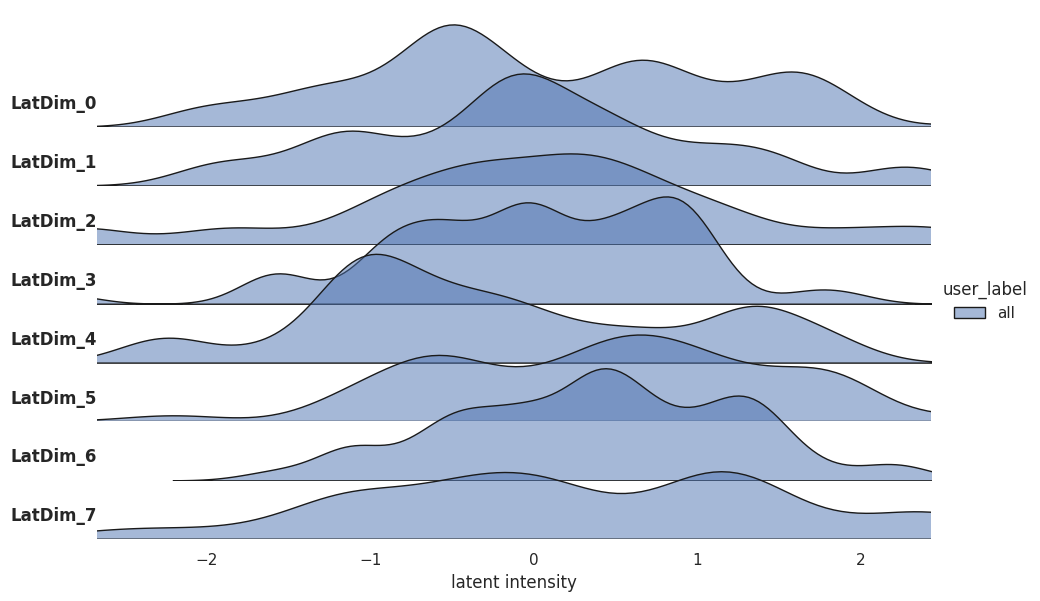

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


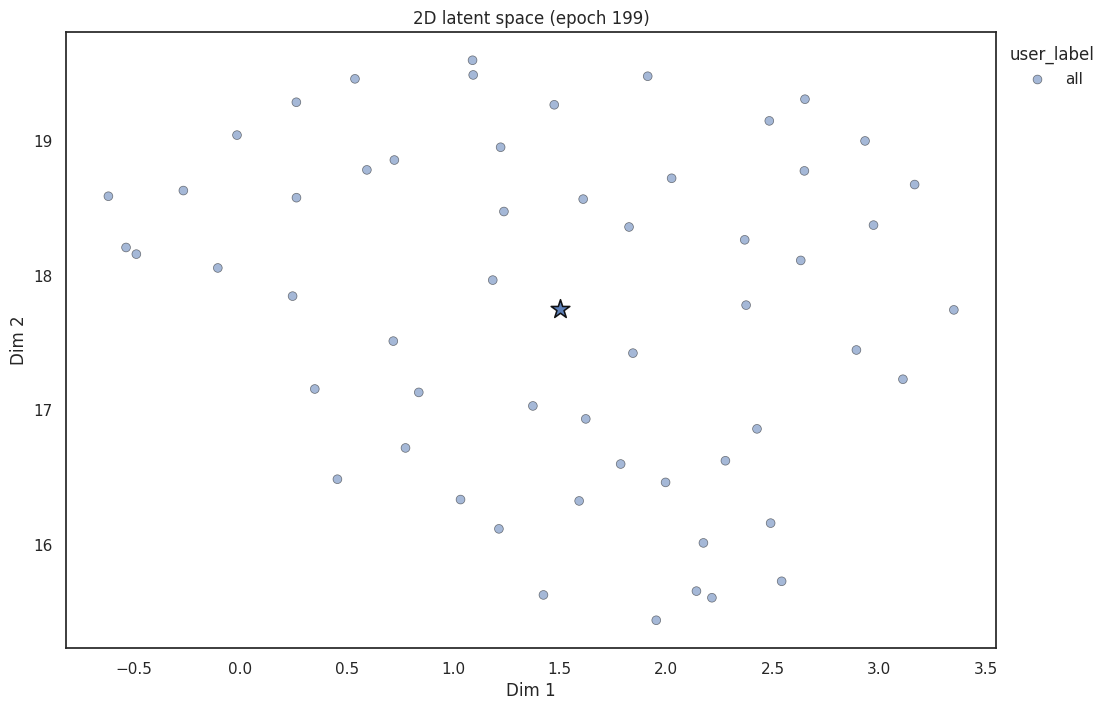

In [4]:
stackix.show_result()

In [5]:
stackix.result.datasets.train.datasets['RNA'].metadata

,AGE,SEX,SMOKING,ANYCOMO,CARDIOVASCULAR,DIABETES,CLIN_STAGE,ECOG,NCT,RESECTION_TYPE,...,HISTO,P_STAGE,GRADE,ADJ_CHEMO,ADJ_RT,OS_STATUS,DFS_STATUS,DFS_MONTHS,COHORT,DFS_STATUS_3Y
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
RESTING_002,73,Male,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2,...,0,1,0.0,1.0,0.0,1.0,1,9.410000,RESTING,1
RESTING_003,58,Male,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2,...,0,1,2.0,1.0,0.0,1.0,1,20.990000,RESTING,1
RESTING_004,75,Female,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2,...,0,2,2.0,0.0,0.0,0.0,0,57.660000,RESTING,0
RESTING_005,72,Female,1.0,1.0,0.0,1.0,4.0,0.0,0.0,1,...,0,4,NaN,1.0,0.0,NaN,1,15.920000,RESTING,1
RESTING_008,67,Male,2.0,0.0,0.0,0.0,NaN,0.0,0.0,2,...,0,0,0.0,0.0,0.0,0.0,0,30.629999,RESTING,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RESTING_280,65,Female,2.0,1.0,1.0,1.0,0.0,0.0,0.0,2,...,1,0,1.0,0.0,0.0,0.0,0,37.860001,RESTING,0
RESTING_285,71,Male,1.0,1.0,1.0,0.0,1.0,1.0,0.0,2,...,0,1,1.0,0.0,0.0,NaN,0,13.720000,RESTING,0
RESTING_295,69,Female,0.0,1.0,0.0,0.0,2.0,0.0,0.0,2,...,0,0,1.0,0.0,0.0,0.0,0,0.460000,RESTING,0


/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


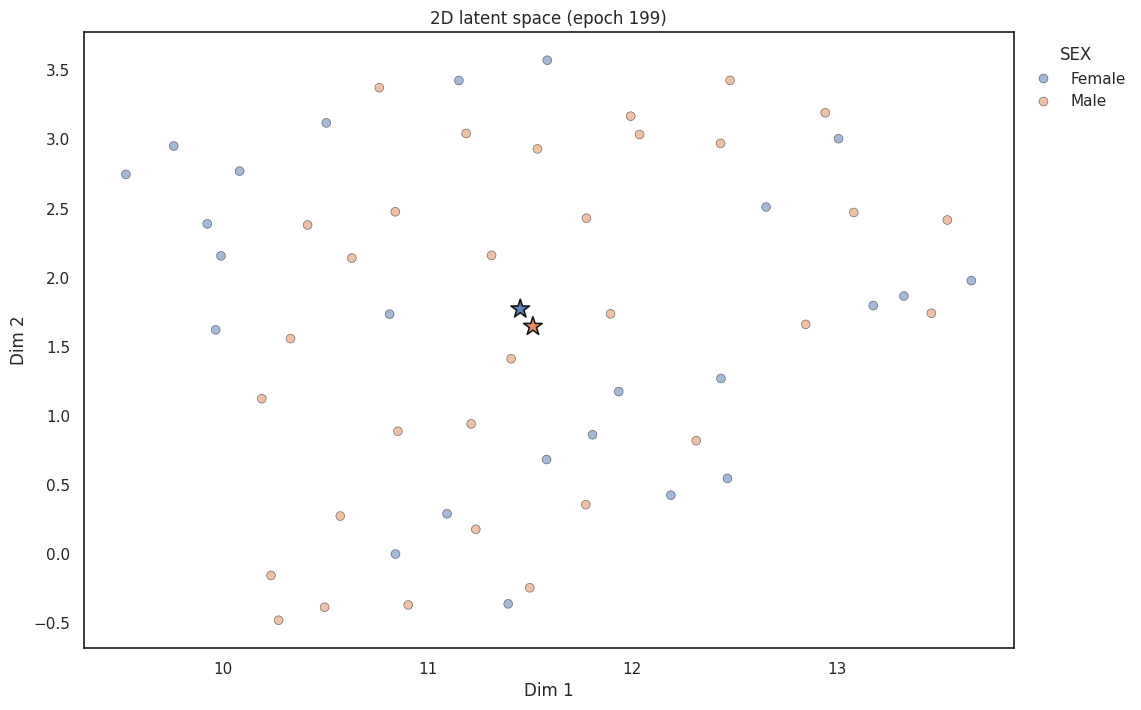

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


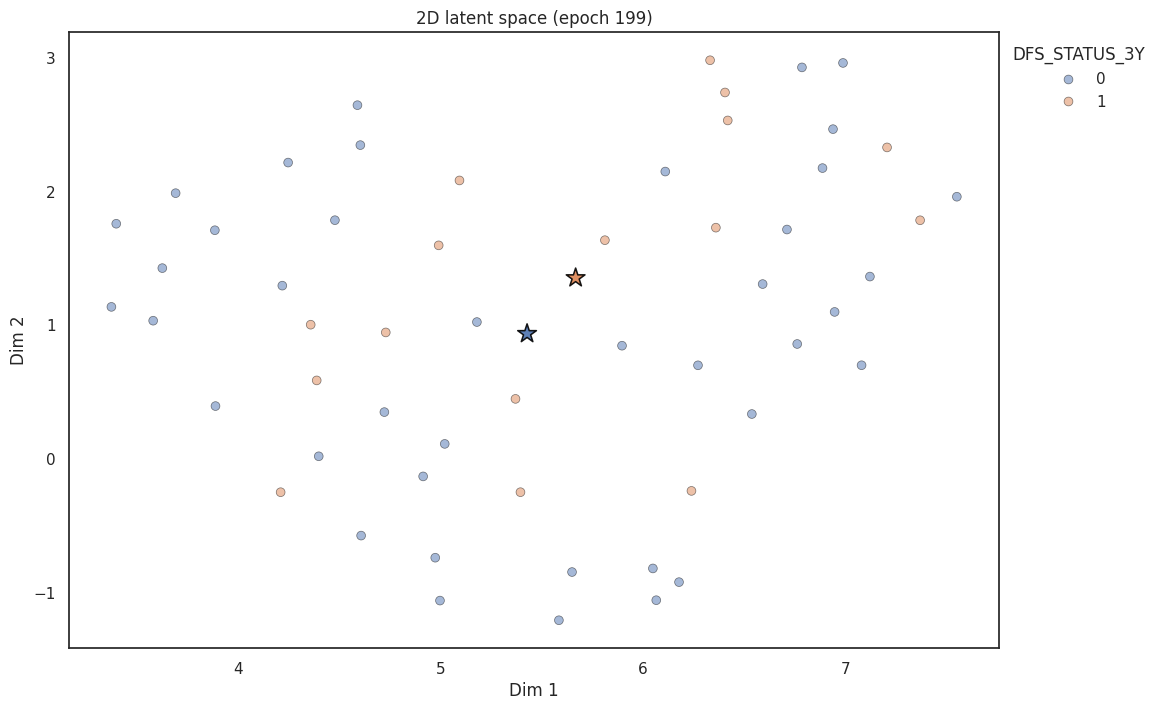

In [6]:
param_list = ['SEX', 'DFS_STATUS_3Y']

stackix._visualizer.show_latent_space(result=stackix.result, plot_type="2D-scatter", split='all', param=param_list)

In [7]:
## Evaluation
from sklearn import linear_model
sklearn_ml_class = linear_model.LogisticRegression(
							solver="sag",
							n_jobs=-1,
							class_weight="balanced",
							max_iter=200,
) ## Support of all sklearn-like models
sklearn_ml_regression = linear_model.LinearRegression()
own_metric_class = 'roc_auc_ovr'  ## sklearn name of metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#string-name-scorers
own_metric_regression = 'r2' 

stackix.evaluate(
	ml_model_class=sklearn_ml_class, # Default is sklearn LogisticRegression
	ml_model_regression=sklearn_ml_regression, # Default is sklearn LinearRegression
	params= param_list,	# No default? ... or all params in annotation?
	metric_class = own_metric_class, # Default is 'roc_auc_ovr'
	metric_regression = own_metric_regression, # Default is 'r2'
	reference_methods = ["PCA", "UMAP", "RandomFeature"], # Default [], no references? or all possible? or only PCA?
	split_type = "use-split", # Default is "use-split", other options: "CV-5", ... "LOOCV"?

)


Perform ML task with feature df: PCA
PCA
Perform ML task with feature df: UMAP
UMAP
Perform ML task with feature df: RandomFeature


/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomFeature_R1
RandomFeature_R2
RandomFeature_R3
RandomFeature_R4
RandomFeature_R5
Perform ML task with feature df: Latent
Latent
Perform ML task for target parameter: SEX
Perform ML task for target parameter: DFS_STATUS_3Y


Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: VarixArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x754ab019b8e0>, valid=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x754aab30ffa0>, test=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x754aab30fc10>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 6 × 8
final_reconstruction:

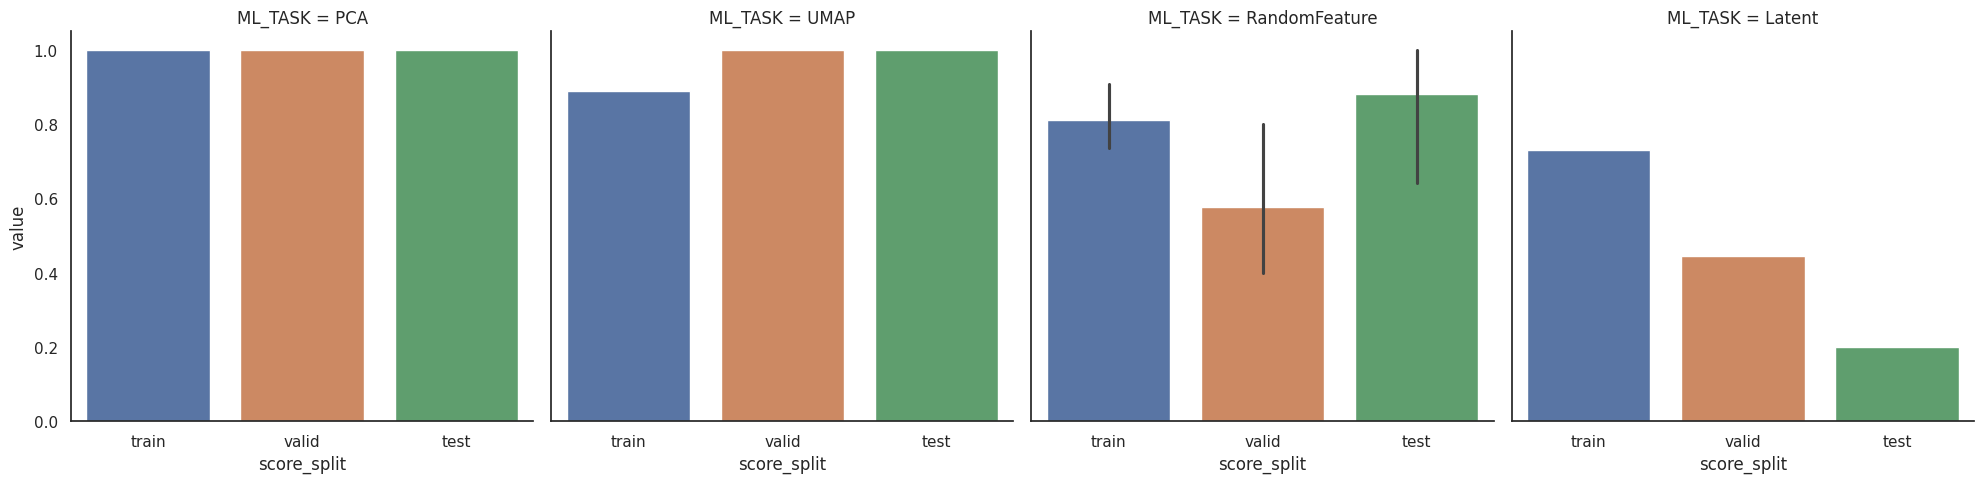

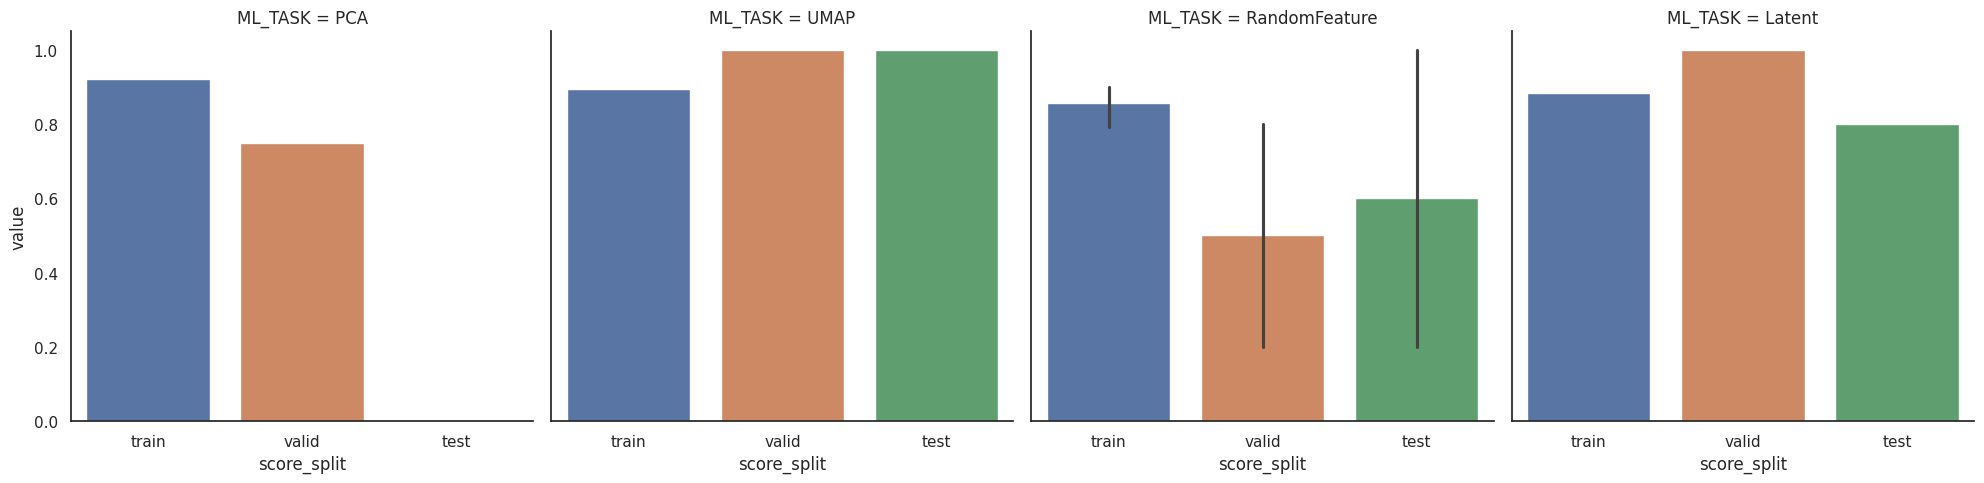

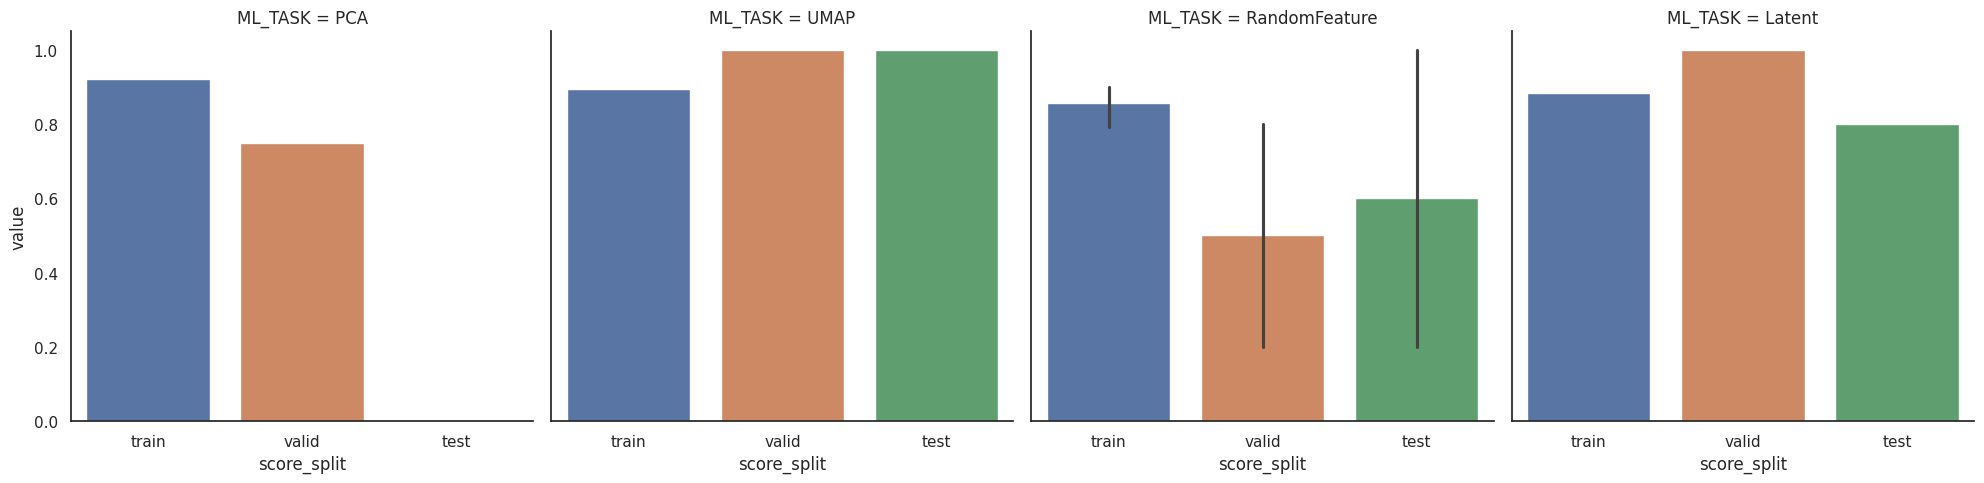

In [8]:
# barplot of evaluation results
stackix._visualizer.show_evaluation(
	param = param_list[1], # Plot one parameter
	metric = own_metric_class, 
	ml_alg=str(sklearn_ml_class), # Call via string of ML method
)

In [9]:
stackix._datasets.train.paired_sample_ids

['RESTING_002',
 'RESTING_005',
 'RESTING_008',
 'RESTING_012',
 'RESTING_013',
 'RESTING_014',
 'RESTING_018',
 'RESTING_026',
 'RESTING_030',
 'RESTING_038',
 'RESTING_042',
 'RESTING_047',
 'RESTING_049',
 'RESTING_067',
 'RESTING_087',
 'RESTING_088',
 'RESTING_091',
 'RESTING_092',
 'RESTING_094',
 'RESTING_097',
 'RESTING_100',
 'RESTING_112',
 'RESTING_114',
 'RESTING_116',
 'RESTING_117',
 'RESTING_126',
 'RESTING_138',
 'RESTING_147',
 'RESTING_149',
 'RESTING_152',
 'RESTING_168',
 'RESTING_173',
 'RESTING_187',
 'RESTING_193',
 'RESTING_211',
 'RESTING_226',
 'RESTING_235',
 'RESTING_237',
 'RESTING_251',
 'RESTING_271',
 'RESTING_278',
 'RESTING_280',
 'RESTING_296',
 'RESTING_299']

In [10]:
# xmodalix = acx.XModalix(config=config)

In [11]:
results = stackix._trainer._orchestrator.modality_results

In [12]:
results["RNA"].sample_ids.get(epoch=-1, split="train")

array(['RESTING_002', 'RESTING_003', 'RESTING_004', 'RESTING_005',
       'RESTING_008', 'RESTING_012', 'RESTING_013', 'RESTING_014',
       'RESTING_017', 'RESTING_018', 'RESTING_019', 'RESTING_020',
       'RESTING_021', 'RESTING_024', 'RESTING_026', 'RESTING_027',
       'RESTING_028', 'RESTING_029', 'RESTING_030', 'RESTING_031',
       'RESTING_033', 'RESTING_034', 'RESTING_038', 'RESTING_039',
       'RESTING_040', 'RESTING_041', 'RESTING_042', 'RESTING_045',
       'RESTING_046', 'RESTING_047', 'RESTING_048', 'RESTING_049',
       'RESTING_051', 'RESTING_052', 'RESTING_053', 'RESTING_054',
       'RESTING_056', 'RESTING_057', 'RESTING_058', 'RESTING_059',
       'RESTING_060', 'RESTING_061', 'RESTING_067', 'RESTING_080',
       'RESTING_087', 'RESTING_088', 'RESTING_091', 'RESTING_092',
       'RESTING_094', 'RESTING_097', 'RESTING_100', 'RESTING_101',
       'RESTING_106', 'RESTING_107', 'RESTING_109', 'RESTING_112',
       'RESTING_113', 'RESTING_114', 'RESTING_116', 'RESTING_1

In [13]:
# xmodalix.run()

In [14]:

# os.getcwd()